In [1]:
import numpy as np 
import pandas as pd 

In [7]:
np.random.seed(42) 
employee_ids=[f"EMP_{i:03d}"for i in range (1,31)] 
dates=pd.date_range("2025-07-01",periods=30,freq="D") 

In [12]:
data={'date':np.tile(dates,len(employee_ids)),'Employee_ID':np.repeat(employee_ids,len(dates)),'Working_Hours':np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)}

In [13]:
df=pd.DataFrame(data)

In [16]:
df.to_csv("employee_working_hours.csv",index=False)

In [20]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [23]:
print(df_csv.head()) 
print(df_csv.describe()) 
print(df_csv["Employee_ID"].nunique())

         date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           5.25
1  2025-07-02     EMP_001           4.16
2  2025-07-03     EMP_001           5.09
3  2025-07-04     EMP_001           7.50
4  2025-07-05     EMP_001           6.53
       Working_Hours
count     900.000000
mean        7.016256
std         1.757421
min         4.030000
25%         5.430000
50%         7.075000
75%         8.532500
max        10.000000
30


In [24]:
total_hours = df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [25]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean() 

In [26]:
threshold_low = 5 
threshold_high = 9

In [29]:
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low 
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"] > threshold_high 

In [31]:
print(df_csv[df_csv["Low_Hour_Flag"] | 
df_csv["High_Hour_Flag"]].head()) 

          date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1   2025-07-02     EMP_001           4.16           True           False
5   2025-07-06     EMP_001           9.36          False            True
17  2025-07-18     EMP_001           9.69          False            True
19  2025-07-20     EMP_001           4.84           True           False
20  2025-07-21     EMP_001           9.21          False            True


In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns 

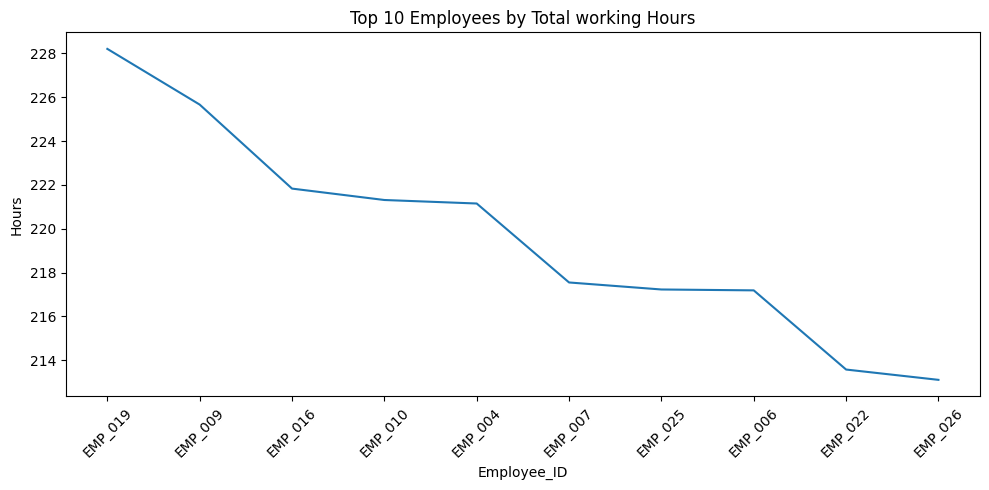

In [36]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.lineplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show()

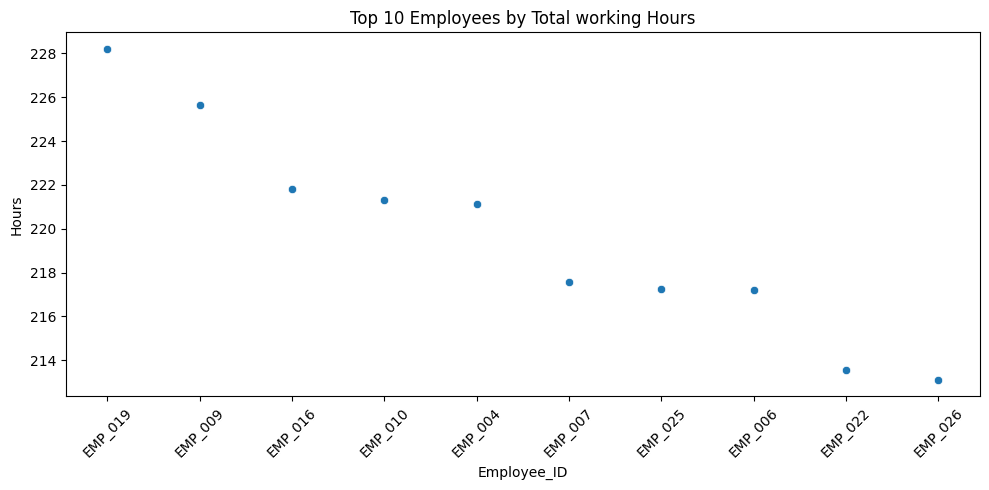

In [37]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.scatterplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show()

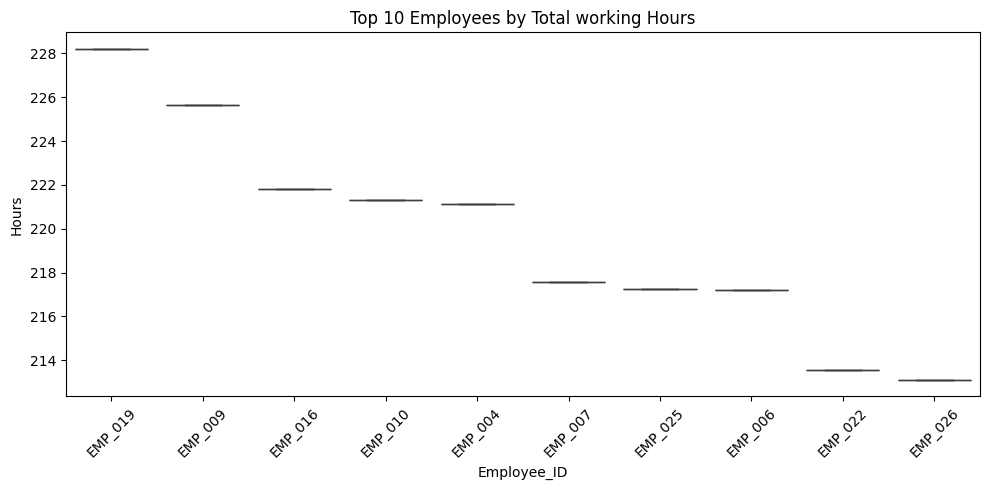

In [40]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.boxplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show()

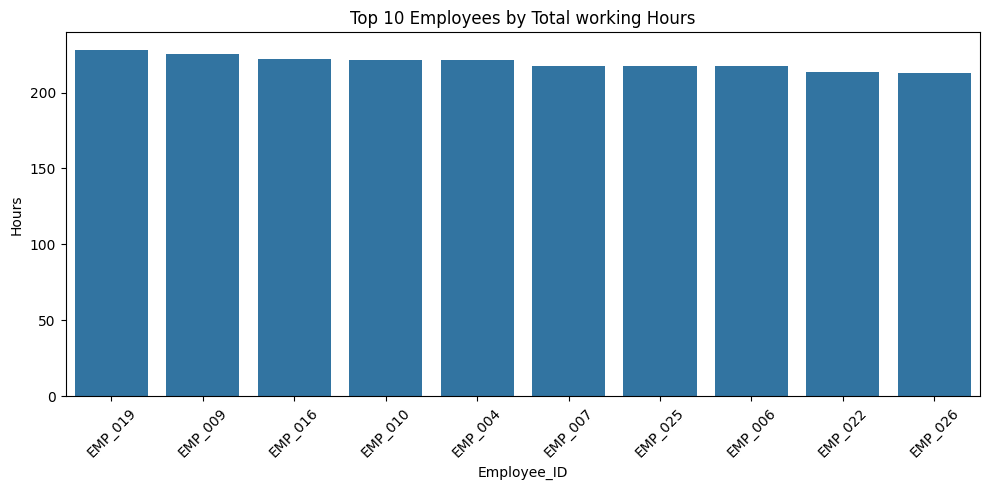

In [41]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.barplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show()